✅ Campaign data loaded with derived metrics.

📊 Simulation complete for C037 with budget change of 20%

🔍 Scenario Comparison:
    Metric   Base Avg  Simulated Avg  Change (%)
0  CTR (%)   1.288634       1.545806   19.956958
1  CVR (%)   6.071114       6.007113   -1.054194
2  CPA ($)  52.557583      53.964024    2.676000


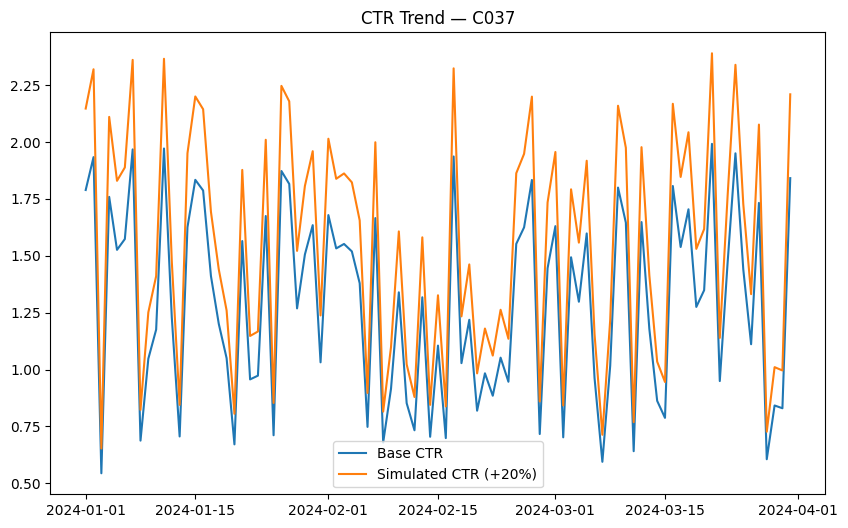

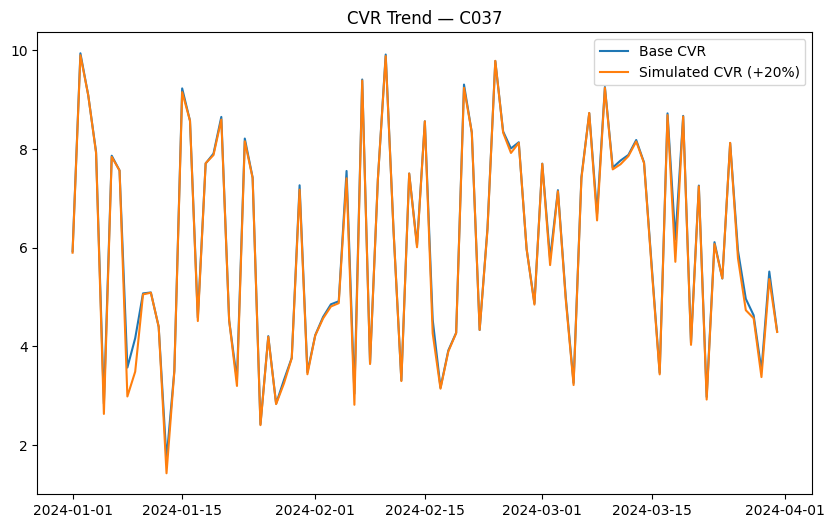

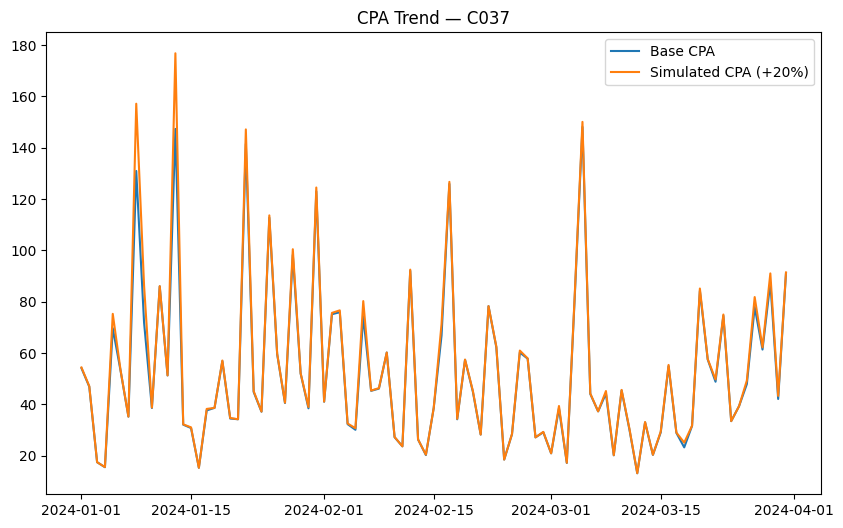

In [2]:
# 04_scenario_simulation.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed campaign data
df = pd.read_csv("../data/adtech_campaign_performance.csv", parse_dates=["date"])

# Derived metrics (if not already added)
df["CTR"] = (df["clicks"] / df["impressions"]) * 100
df["CVR"] = (df["conversions"] / df["clicks"].replace(0, np.nan)) * 100
df["CPC"] = df["cost"] / df["clicks"].replace(0, np.nan)
df["CPA"] = df["cost"] / df["conversions"].replace(0, np.nan)

print("✅ Campaign data loaded with derived metrics.")

# -----------------------------------------------------------------------------
# 🧩 1. Define simulation functions
# -----------------------------------------------------------------------------
def simulate_budget_change(df, campaign_id, budget_change_percent):
    """
    Simulate the impact of increasing/decreasing campaign budget.
    """
    base = df[df["campaign_id"] == campaign_id].copy()
    avg_ctr = base["CTR"].mean()
    avg_cvr = base["CVR"].mean()

    new_df = base.copy()
    change_factor = 1 + (budget_change_percent / 100)

    new_df["simulated_cost"] = new_df["cost"] * change_factor
    new_df["simulated_clicks"] = (new_df["clicks"] * change_factor).astype(int)
    new_df["simulated_conversions"] = (new_df["conversions"] * change_factor).astype(int)

    # Compute new derived metrics
    new_df["sim_CTR"] = (new_df["simulated_clicks"] / new_df["impressions"]) * 100
    new_df["sim_CVR"] = (new_df["simulated_conversions"] / new_df["simulated_clicks"].replace(0, np.nan)) * 100
    new_df["sim_CPA"] = new_df["simulated_cost"] / new_df["simulated_conversions"].replace(0, np.nan)

    print(f"\n📊 Simulation complete for {campaign_id} with budget change of {budget_change_percent}%")
    return new_df[["date", "CTR", "CVR", "CPA", "sim_CTR", "sim_CVR", "sim_CPA"]]


def compare_scenarios(df_base, df_simulated):
    """
    Compare base vs simulated campaign performance.
    """
    comparison = pd.DataFrame({
        "Metric": ["CTR (%)", "CVR (%)", "CPA ($)"],
        "Base Avg": [
            df_base["CTR"].mean(),
            df_base["CVR"].mean(),
            df_base["CPA"].mean(),
        ],
        "Simulated Avg": [
            df_simulated["sim_CTR"].mean(),
            df_simulated["sim_CVR"].mean(),
            df_simulated["sim_CPA"].mean(),
        ],
    })
    comparison["Change (%)"] = ((comparison["Simulated Avg"] - comparison["Base Avg"]) / comparison["Base Avg"]) * 100
    return comparison


# -----------------------------------------------------------------------------
# 🧪 2. Run Simulation Example
# -----------------------------------------------------------------------------
example_campaign = df["campaign_id"].sample(1).values[0]
budget_change = 20  # e.g., increase budget by 20%

base_df = df[df["campaign_id"] == example_campaign]
simulated_df = simulate_budget_change(df, example_campaign, budget_change)

comparison_table = compare_scenarios(base_df, simulated_df)
print("\n🔍 Scenario Comparison:")
print(comparison_table)

# -----------------------------------------------------------------------------
# 📈 3. Visualization
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(base_df["date"], base_df["CTR"], label="Base CTR")
plt.plot(simulated_df["date"], simulated_df["sim_CTR"], label="Simulated CTR (+20%)")
plt.title(f"CTR Trend — {example_campaign}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(base_df["date"], base_df["CVR"], label="Base CVR")
plt.plot(simulated_df["date"], simulated_df["sim_CVR"], label="Simulated CVR (+20%)")
plt.title(f"CVR Trend — {example_campaign}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(base_df["date"], base_df["CPA"], label="Base CPA")
plt.plot(simulated_df["date"], simulated_df["sim_CPA"], label="Simulated CPA (+20%)")
plt.title(f"CPA Trend — {example_campaign}")
plt.legend()
plt.show()
